# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

In [1]:
import os
from schelling.app import page

os.chdir('./schelling')
page

Cannot show ipywidgets in text

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from schelling.model import Schelling

In [3]:
from mesa.batchrunner import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [4]:
fixed_params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2}
variable_parms = {"homophily": [h/10 for h in range(1, 11)]}
all_params = fixed_params | variable_parms

results = batch_run(
    Schelling,
    parameters=all_params,
    iterations=10,
    max_steps=200,
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,height,width,density,minority_pc,homophily,happy,pct_happy,similarity_fraction,population,minority_pct,AgentID,agent_type
0,0,0,11,10,10,0.8,0.2,0.1,82,98.795181,0.689114,83,19.277108,1,0
1,0,0,11,10,10,0.8,0.2,0.1,82,98.795181,0.689114,83,19.277108,2,0
2,0,0,11,10,10,0.8,0.2,0.1,82,98.795181,0.689114,83,19.277108,3,0
3,0,0,11,10,10,0.8,0.2,0.1,82,98.795181,0.689114,83,19.277108,4,0
4,0,0,11,10,10,0.8,0.2,0.1,82,98.795181,0.689114,83,19.277108,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,99,9,200,10,10,0.8,0.2,1.0,14,18.181818,0.677087,77,16.883117,73,0
8044,99,9,200,10,10,0.8,0.2,1.0,14,18.181818,0.677087,77,16.883117,74,0
8045,99,9,200,10,10,0.8,0.2,1.0,14,18.181818,0.677087,77,16.883117,75,1
8046,99,9,200,10,10,0.8,0.2,1.0,14,18.181818,0.677087,77,16.883117,76,0


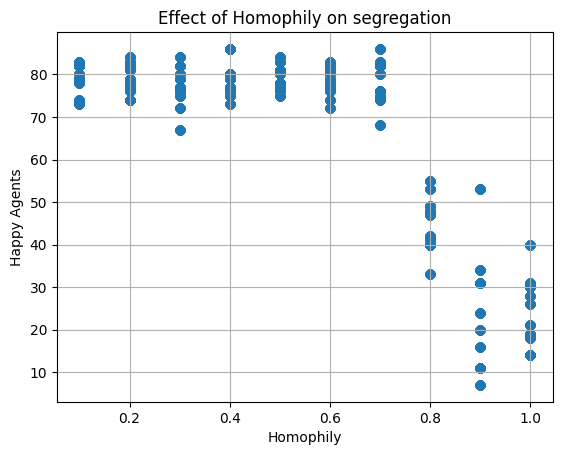

In [6]:
plt.scatter(df.homophily, df.happy)
plt.xlabel("Homophily")
plt.ylabel("Happy Agents")
plt.grid()
plt.title("Effect of Homophily on segregation")
plt.show()

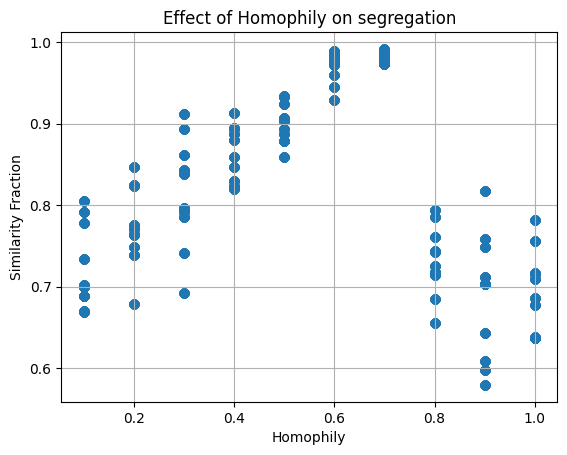

In [7]:
plt.scatter(df.homophily, df.similarity_fraction)
plt.xlabel("Homophily")
plt.ylabel("Similarity Fraction")
plt.grid()
plt.title("Effect of Homophily on segregation")
plt.show()

In [10]:
fixed_params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.4}
variable_parms = {"homophily": [h/10 for h in range(1, 11)]}
all_params = fixed_params | variable_parms

results = batch_run(
    Schelling,
    parameters=all_params,
    iterations=10,
    max_steps=200,
)

  0%|          | 0/100 [00:00<?, ?it/s]

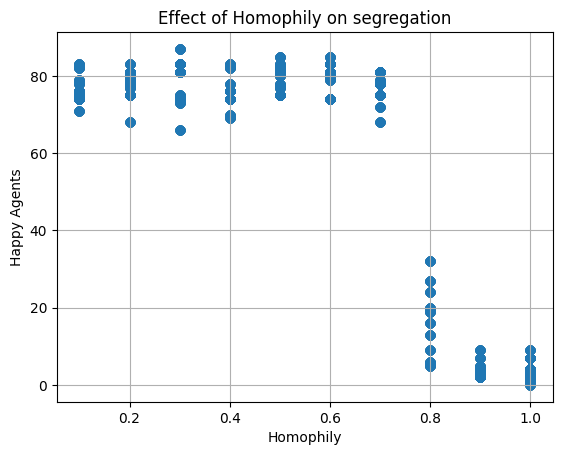

In [11]:
df = pd.DataFrame(results)
plt.scatter(df.homophily, df.happy)
plt.xlabel("Homophily")
plt.ylabel("Happy Agents")
plt.grid()
plt.title("Effect of Homophily on segregation")
plt.show()

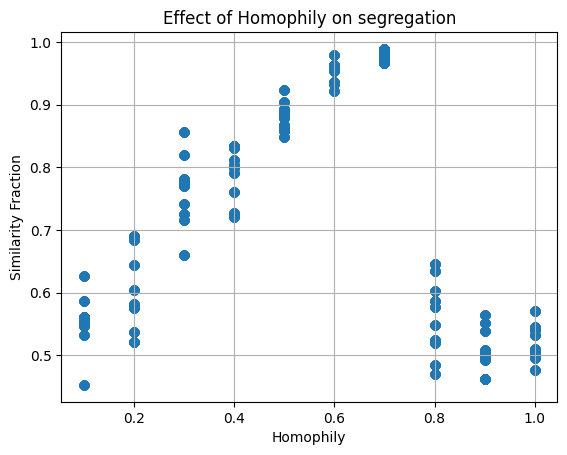

In [12]:
plt.scatter(df.homophily, df.similarity_fraction)
plt.xlabel("Homophily")
plt.ylabel("Similarity Fraction")
plt.grid()
plt.title("Effect of Homophily on segregation")
plt.show()